In [140]:
# %load ./import.py
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
!ls ./Data


Book1.xlsx


In [141]:
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys                    # For data size


In [142]:
df=pd.read_excel("./Data/Book1.xlsx")
df

,Customer,Salary Score,Bill Score,Credit Score
0,1,99,96,97
1,2,20,23,32
2,3,98,97,97
3,4,65,62,60
4,5,75,60,65
5,6,65,67,79
6,7,99,96,97
7,8,12,19,27
8,9,55,65,75


In [143]:
df.describe()

,Customer,Salary Score,Bill Score,Credit Score
count,9.000000,9.000000,9.000000,9.000000
mean,5.000000,65.333333,65.000000,69.888889
std,2.738613,32.469216,29.291637,26.718179
min,1.000000,12.000000,19.000000,27.000000
25%,3.000000,55.000000,60.000000,60.000000
50%,5.000000,65.000000,65.000000,75.000000
75%,7.000000,98.000000,96.000000,97.000000
max,9.000000,99.000000,97.000000,97.000000


In [144]:
df.dtypes

Customer        int64
Salary Score    int64
Bill Score      int64
Credit Score    int64
dtype: object

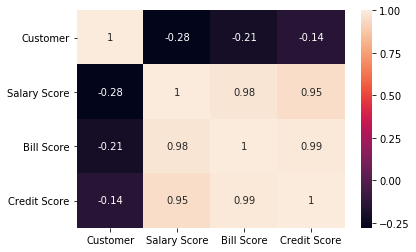

In [145]:
df_corr=df.corr()
sns.heatmap(df_corr, annot=True)

In [146]:
ss=StandardScaler()
ss.fit_transform(df)

/home/boo/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/boo/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.54919334,  1.09977685,  1.12252058,  1.0762588 ],
       [-1.161895  , -1.48088765, -1.52083433, -1.50411578],
       [-0.77459667,  1.06711022,  1.15873092,  1.0762588 ],
       [-0.38729833, -0.01088888, -0.10863102, -0.39256981],
       [ 0.        ,  0.31577751, -0.18105171, -0.19407946],
       [ 0.38729833, -0.01088888,  0.07242068,  0.36169353],
       [ 0.77459667,  1.09977685,  1.12252058,  1.0762588 ],
       [ 1.161895  , -1.74222076, -1.6656757 , -1.70260614],
       [ 1.54919334, -0.33755527,  0.        ,  0.20290125]])

### Attempt 1: K Mean

In [147]:
df.columns

Index(['Customer', 'Salary Score', 'Bill Score', 'Credit Score'], dtype='object')

In [148]:
df["Score"]=0
df["Score"][0]=1
df

,Customer,Salary Score,Bill Score,Credit Score,Score
0,1,99,96,97,1
1,2,20,23,32,0
2,3,98,97,97,0
3,4,65,62,60,0
4,5,75,60,65,0
5,6,65,67,79,0
6,7,99,96,97,0
7,8,12,19,27,0
8,9,55,65,75,0


In [149]:
score_cols=["Salary Score", 'Bill Score', "Credit Score"]

for i in df.index:
    col_sum=0
    for col in score_cols:
        col_sum+=(df[col][i])**2
    col_sum=col_sum**0.5
    df["Score"][i]=col_sum

    

In [150]:
df

,Customer,Salary Score,Bill Score,Credit Score,Score
0,1,99,96,97,168
1,2,20,23,32,44
2,3,98,97,97,168
3,4,65,62,60,108
4,5,75,60,65,115
5,6,65,67,79,122
6,7,99,96,97,168
7,8,12,19,27,35
8,9,55,65,75,113


In [155]:
cluster=[df["Score"].quantile(.33), \
         df["Score"].quantile(.66), \
         df["Score"].quantile(.99)]
c

TypeError: type list doesn't define __round__ method

In [152]:

def cluster_finder(df, cluster, iteration):
    index_list=[]
    for i in df.index:
        cluster_d=cluster-df["Score"][i]
        cluster_d=np.absolute(cluster_d)
        min_d=np.min(cluster_d)    
        index= np.where(cluster_d==min_d)
        index=index[0]
        index_list.append(index)
    return index_list

In [153]:
cluster_finder(df, cluster, "ITR_1")

[array([3]),
 array([1]),
 array([3]),
 array([1]),
 array([1]),
 array([1]),
 array([3]),
 array([1]),
 array([1])]